# Basic Data Gathering

Extracting basic dependencies between python modules (every .py file in Python is considered a module)

In [1]:
import sys
!{sys.executable} -m pip install gitpython
!{sys.executable} -m pip install pyvis

     |████████████████████████████████| 163kB 5.2MB/s 
     |████████████████████████████████| 71kB 5.9MB/s 


In [2]:
# all the needed imports
import os
import sys
import re

import pathlib
from pathlib import Path

import networkx as nx
import matplotlib.pyplot as plt

from git import Repo

In [3]:
cwd = os.getcwd()
print(cwd)


/content


In [4]:
# NOTE: this must end in /
CODE_ROOT_FOLDER="/content/Zeegu-Core/"


In [5]:
if not os.path.exists(CODE_ROOT_FOLDER):
  Repo.clone_from("https://github.com/zeeguu-ecosystem/Zeeguu-Core", CODE_ROOT_FOLDER)


In [6]:
repo = Repo(CODE_ROOT_FOLDER)

In [7]:
# utility functions used later

# full path to the file given a relative file_name
def file_path(file_name):
    return CODE_ROOT_FOLDER+file_name

In [8]:
# naïve way of extracting imports
def imports(file):

    def extract_import_from_line(line):
      x = re.search("^import (\S+)", line) 
      x = re.search("^from (\S+)", line) 
      return x.group(1)

    # extracts all the imported modules from a file
    lines = [line for line in open(file)]
    
    all_imports = []
    for line in lines:
        try:
            all_imports.append(extract_import_from_line(line))
        except:
            continue

    return all_imports

assert "sqlalchemy" in imports(file_path('zeeguu_core/model/user.py'))

In [9]:
def module_from_file_path(folder_prefix, full_path):
    # extracting a module from a file name
    # e.g. ../zeeguu_core/model/user.py -> zeeguu_core.model.user
    
    file_name = full_path[len(folder_prefix):]
    file_name = file_name.replace("/",".")
    file_name = file_name.replace(".py","")
    return file_name

def module(full_path):
    return module_from_file_path(CODE_ROOT_FOLDER, full_path)

assert 'zeeguu_core.model.user' == module(file_path('zeeguu_core/model/user.py'))

In [10]:
def dependencies_graph():
    files = Path(CODE_ROOT_FOLDER).rglob("*.py")

    G = nx.Graph()

    for file in files:

        m = module(str(file))
        if m not in G.nodes:
            G.add_node(m)

        for each in imports(str(file)):
            G.add_edge(m, each)

    return G

In [11]:
def draw_graph(G):
    plt.figure(figsize=(10,6))
    nx.draw(G)
    plt.show()

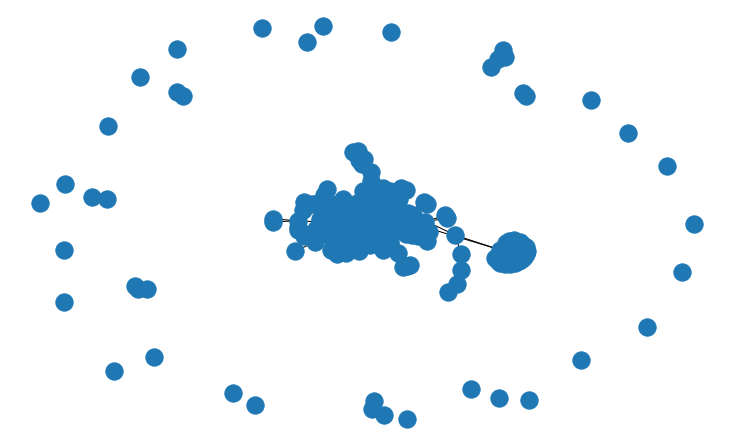

In [12]:
G = dependencies_graph()
draw_graph(G)